## Run gear experiment
#### Input gear metadata (at least gear number) and run experiment to add test data to dictionary

In [50]:
import os
import pickle
import numpy as np

from Experiment_Utils import Run_Experiment,  plot_dict_key

In [51]:
# FOR DEBUGGING - feel free to ignore.
%load_ext autoreload
%autoreload 2
from Experiment_Utils import Run_Experiment, plot_dict_key

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
file_dir = '/home/gmc/Python/Mod_DOE'
file_name = 'Taguchi_test_dict.pkl'
Experiment_Runtime = 5 #s
Num_Experiment = 6 # trials
Direction = False # start CW

In [56]:
# Set design number - FOR TAGUCHI DESIGNS
Gear_Design_Number = 4

In [54]:
os.chdir(file_dir)
try:
    starting_dict = pickle.load(open(file_name, 'rb'))
except:
    print('Making new dict')
    starting_dict = {}

In [57]:
print(f'Current gear number: {Gear_Design_Number}')
raise RuntimeError("MAKE SURE YOU UPDATED THE GEAR NUMBER!!")

Current gear number: 4


RuntimeError: MAKE SURE YOU UPDATED THE GEAR NUMBER!!

In [58]:
in_dict = starting_dict.copy()
in_key = 'Taguchi_Design_' + str(Gear_Design_Number)
for i in range(Num_Experiment):
    in_dict = Run_Experiment(in_dict, Experiment_Runtime, in_key, Direction)
    Direction = not Direction

Succeeded to open the port
Succeeded to change the baudrate
Running motor CW for 5 seconds ...
Posting load vals, shape: 171
Posting current vals, shape: 137
Key does not exist, creating new key
Succeeded to open the port
Succeeded to change the baudrate
Running motor CCW for 5 seconds ...
Posting load vals, shape: 159
Posting current vals, shape: 95
Key exists, appending
Succeeded to open the port
Succeeded to change the baudrate
Running motor CW for 5 seconds ...
Posting load vals, shape: 161
Posting current vals, shape: 96
Key exists, appending
Succeeded to open the port
Succeeded to change the baudrate
Running motor CCW for 5 seconds ...
Posting load vals, shape: 161
Posting current vals, shape: 165
Key exists, appending
Succeeded to open the port
Succeeded to change the baudrate
Running motor CW for 5 seconds ...
Posting load vals, shape: 179
Posting current vals, shape: 97
Key exists, appending
Succeeded to open the port
Succeeded to change the baudrate
Running motor CCW for 5 se

### We can view the data from the latest (nth) test

Taguchi_Design_4_test_fig


<string>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<string>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


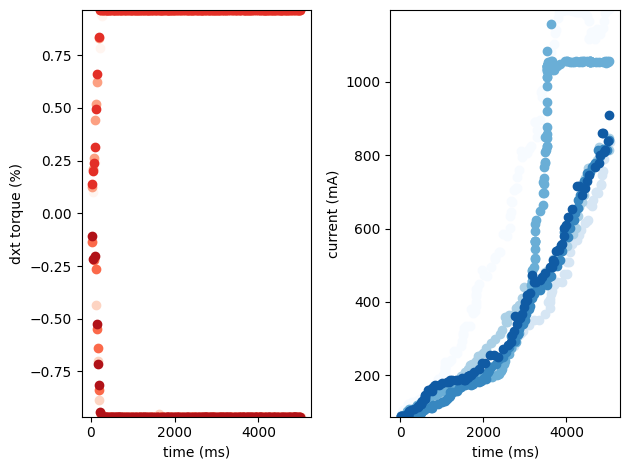

In [59]:
# load latest values
update_dict = in_dict # make sure plotted values are the ones updating
key = list(update_dict.keys())[-1]
# plot - TODO: pull the max torque/current vals from a function similar to plot_dict_key, pull design parameters from Taguchi .csv, create entry for Ax
save_to = '/home/gmc/Documents/Gear_Design'
pic_name = in_key + "_test_fig"
print(pic_name)
plot_dict_key(update_dict, key, save_loc = save_to, file_name = pic_name)

In [ ]:
raise RuntimeError("MAKE SURE YOU WANT TO SAVE THIS DATA!!")

RuntimeError: MAKE SURE YOU WANT TO SAVE THIS DATA!!

In [60]:
os.chdir(file_dir)
pickle.dump(update_dict,open(file_name, 'wb'))